# Import Libraries and Load Dataset

In [224]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
#Load and show dataset
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [226]:
#Check statistics for numerical attributes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [227]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing Data

In [228]:
#Finding Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [229]:
#Filling Missing Values for Numerical Terms
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [230]:
#Filling Missing Values for Categorical Terms
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [231]:
#Double Checking Null Values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [232]:
#Categorical Attributes Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

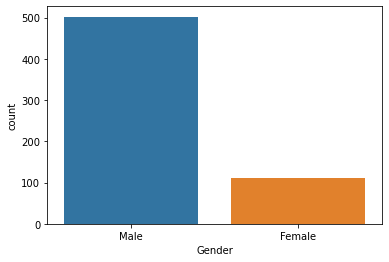

In [233]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

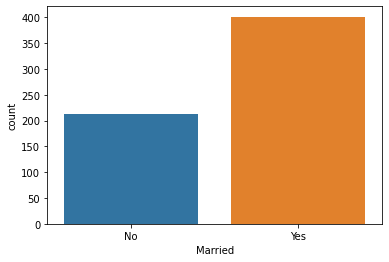

In [234]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

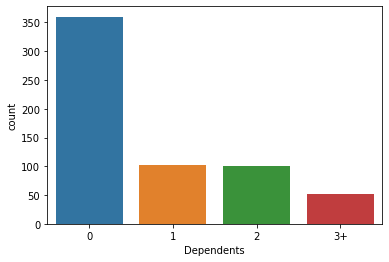

In [235]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

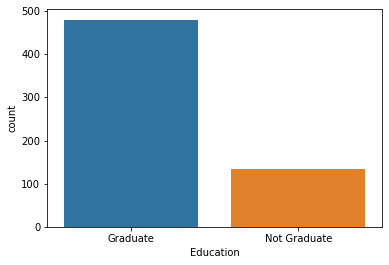

In [236]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

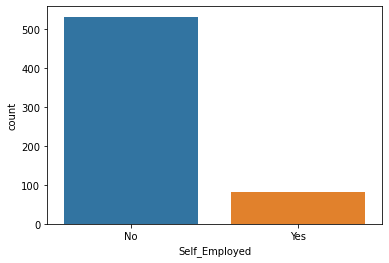

In [237]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

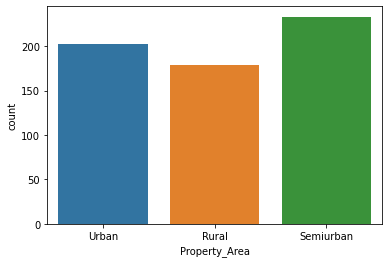

In [238]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

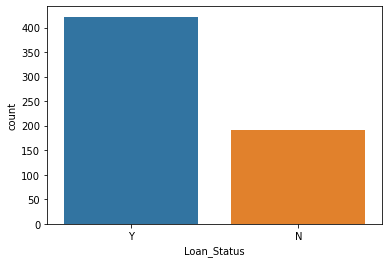

In [239]:
sns.countplot(df['Loan_Status'])

In [240]:
#Numerical Attributes Visualization

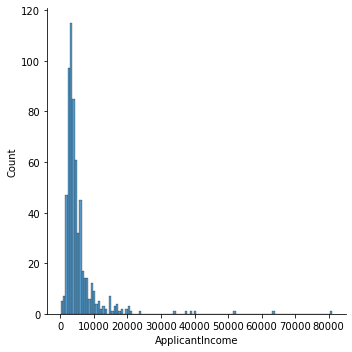

In [241]:
sns.displot(df["ApplicantIncome"])

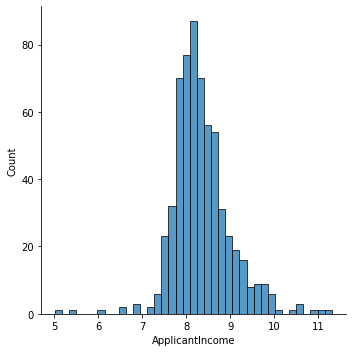

In [242]:
#Apply Log Transformation to the Attribute
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
sns.displot(df['ApplicantIncome'])

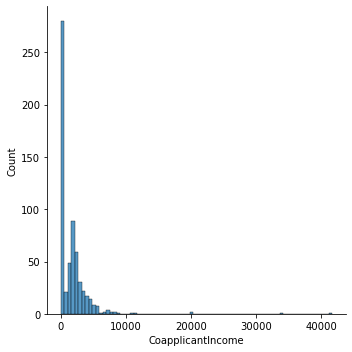

In [243]:
sns.displot(df['CoapplicantIncome'])

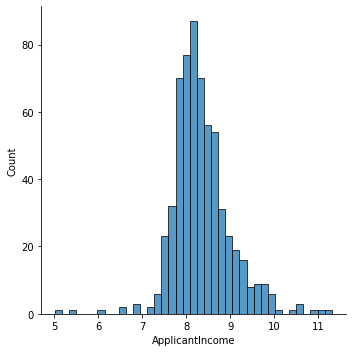

In [244]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
sns.displot(df['ApplicantIncome'])

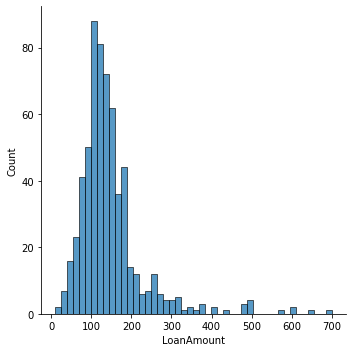

In [245]:
sns.displot(df['LoanAmount'])

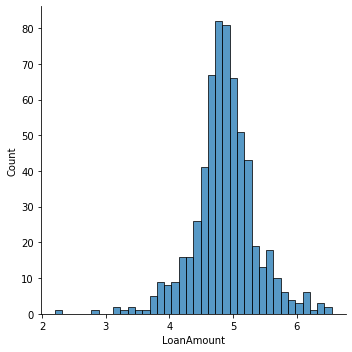

In [246]:
df['LoanAmount']=np.log(df['LoanAmount'])
sns.displot(df['LoanAmount'])

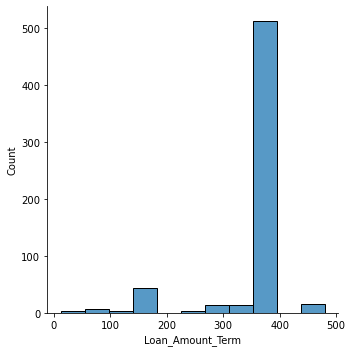

In [247]:
sns.displot(df['Loan_Amount_Term'])

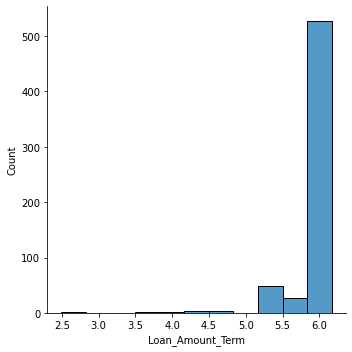

In [248]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term'])

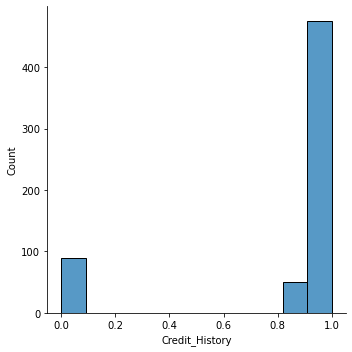

In [249]:
sns.displot(df['Credit_History'])

# Creation of New Attributes

In [250]:
#total income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,-inf
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,15.748649
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,15.622276
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,-inf


# Log Transformation

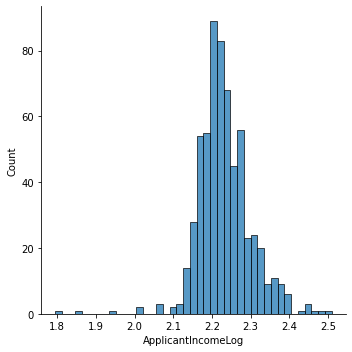

In [251]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.displot(df['ApplicantIncomeLog'])

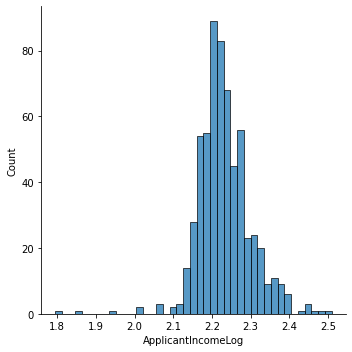

In [252]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome']+1)
sns.displot(df['ApplicantIncomeLog'])

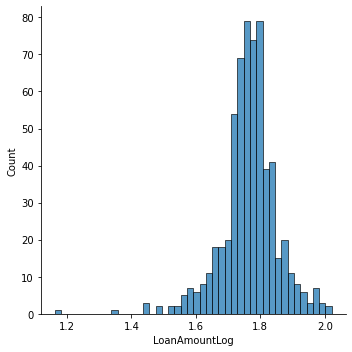

In [253]:
df['LoanAmountLog']=np.log(df['LoanAmount']+1)
sns.displot(df['LoanAmountLog'])

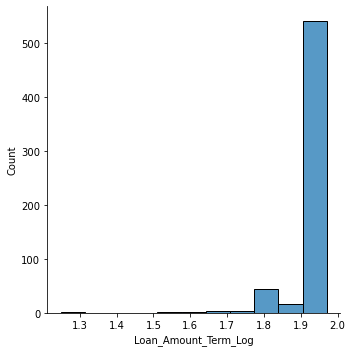

In [254]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term']+1)
sns.displot(df['Loan_Amount_Term_Log'])

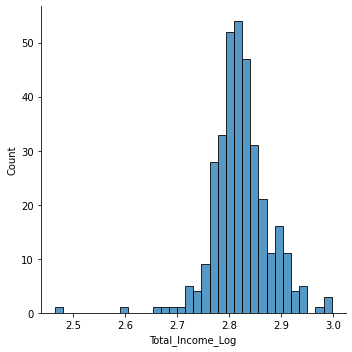

In [255]:
df['Total_Income_Log']=np.log(df['Total_Income']+1)
sns.displot(df['Total_Income_Log'])

In [256]:
#Tripple Checking Null Values
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Total_Income              0
ApplicantIncomeLog        0
CoapplicantIncomeLog    273
LoanAmountLog             0
Loan_Amount_Term_Log      0
Total_Income_Log        273
dtype: int64

In [257]:
df['CoapplicantIncomeLog']=df['CoapplicantIncomeLog'].fillna(df['CoapplicantIncomeLog'].mean())
df['Total_Income_Log']=df['Total_Income_Log'].fillna(df['Total_Income_Log'].mean())

In [258]:
#Quadruple Checking Null Values
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Total_Income            0
ApplicantIncomeLog      0
CoapplicantIncomeLog    0
LoanAmountLog           0
Loan_Amount_Term_Log    0
Total_Income_Log        0
dtype: int64

# Correlation Matrix

<AxesSubplot:>

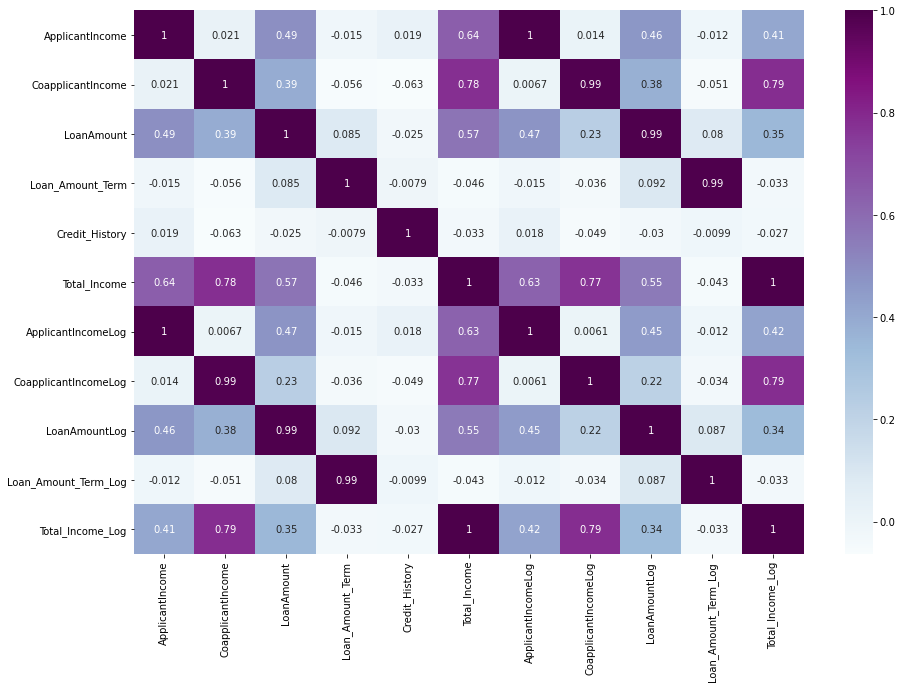

In [259]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="BuPu")

In [260]:
#Drop Unnecessary Columns
cols = ['ApplicantIncome','CoapplicantIncome',"LoanAmount","Loan_Amount_Term", "Total_Income",'Loan_ID', 'CoapplicantIncomeLog']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.269445,1.789495,1.929505,2.822897
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.243908,1.766789,1.929505,2.818318
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.197932,1.646667,1.929505,2.822897
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.181175,1.755699,1.929505,2.810744
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.272076,1.783183,1.929505,2.822897


# Label Encoding

In [261]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [262]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,2.269445,1.789495,1.929505,2.822897
1,1,1,1,0,0,1.0,0,0,2.243908,1.766789,1.929505,2.818318
2,1,1,0,0,1,1.0,2,1,2.197932,1.646667,1.929505,2.822897
3,1,1,0,1,0,1.0,2,1,2.181175,1.755699,1.929505,2.810744
4,1,0,0,0,0,1.0,2,1,2.272076,1.783183,1.929505,2.822897


# Train-Test Split

In [263]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [264]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [265]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
    

In [266]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [267]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 70.36252165800347


In [268]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 78.57142857142857
Cross validation is 79.31627349060376


In [269]:
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 74.67532467532467
Cross validation is 76.87591630014661


# Hyperparameter Tuning

In [273]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model,X,y)

Accuracy is 75.32467532467533
Cross validation is 80.78368652538984


# Confusion Matrix

In [274]:
#Use Random forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [275]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 5, 95]], dtype=int64)

<AxesSubplot:>

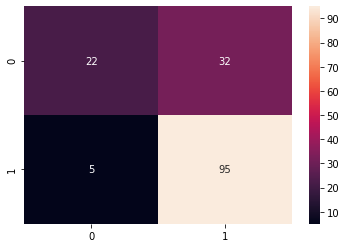

In [277]:
sns.heatmap(cm,annot=True)